In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data import data_loader

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [2]:
train_generator, val_generator, test_generator = data_loader.load_data()

Found 70499 images belonging to 29 classes.
Found 7830 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    input_shape = data_batch.shape[1:]
    num_classes = labels_batch.shape[1]
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 29)


In [4]:
input_shape

(150, 150, 3)

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (4, 4), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (4, 4), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (4, 4), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (4, 4), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 37, 37, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                        

In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs=10
)

Epoch 1/10


2022-12-13 18:07:28.544601: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 18:07:29.027983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - ETA: 0s - loss: 0.7412 - accuracy: 0.7611

2022-12-13 18:08:37.322628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - 76s 64ms/step - loss: 0.7412 - accuracy: 0.7611 - val_loss: 0.6135 - val_accuracy: 0.8305
Epoch 2/10
1102/1102 [==============================] - 74s 67ms/step - loss: 0.1144 - accuracy: 0.9605 - val_loss: 0.3673 - val_accuracy: 0.8912
Epoch 3/10
1102/1102 [==============================] - 67s 61ms/step - loss: 0.0830 - accuracy: 0.9732 - val_loss: 0.3625 - val_accuracy: 0.8948
Epoch 4/10
1102/1102 [==============================] - 66s 60ms/step - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.3412 - val_accuracy: 0.9252
Epoch 5/10
1102/1102 [==============================] - 69s 62ms/step - loss: 0.0605 - accuracy: 0.9822 - val_loss: 0.2182 - val_accuracy: 0.9461
Epoch 6/10
1102/1102 [==============================] - 66s 60ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.1415 - val_accuracy: 0.9558
Epoch 7/10
1102/1102 [==============================] - 66s 60ms/step - loss: 0.0446 - accuracy: 0.9873 - val_loss: 0.3917 - val_accura

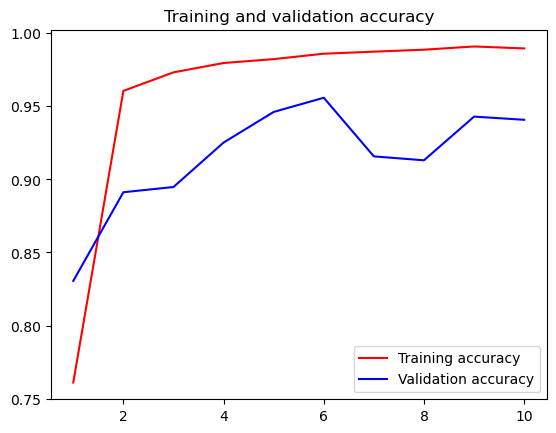

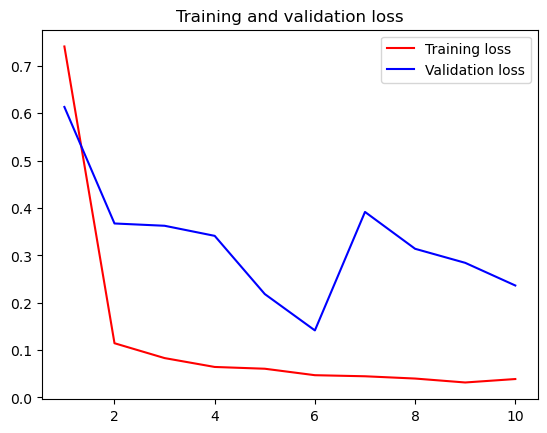

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
scores = model.evaluate(test_generator)

print(f'Test {model.metrics_names[1]} is {100 * scores[1]}')
print(f'Test {model.metrics_names[0]} is {scores[0]}')

136/136 [==============================] - 7s 54ms/step - loss: 0.0309 - accuracy: 0.9923
Test accuracy is 99.22988414764404
Test loss is 0.030878271907567978


In [15]:
from sklearn.metrics import classification_report
 
test_labels=test_generator.classes 

predictions=model.predict(test_generator, verbose=1)

y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

  3/136 [..............................] - ETA: 4s 

2022-12-13 18:19:21.272017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


136/136 [==============================] - 7s 50ms/step
              precision    recall  f1-score   support

           0       0.04      0.04      0.04       300
           1       0.02      0.02      0.02       300
           2       0.07      0.07      0.07       300
           3       0.04      0.04      0.04       300
           4       0.04      0.04      0.04       300
           5       0.04      0.04      0.04       300
           6       0.04      0.04      0.04       300
           7       0.04      0.04      0.04       300
           8       0.02      0.02      0.02       300
           9       0.04      0.04      0.04       300
          10       0.04      0.04      0.04       300
          11       0.04      0.04      0.04       300
          12       0.06      0.06      0.06       300
          13       0.03      0.03      0.03       300
          14       0.03      0.03      0.03       300
          15       0.03      0.03      0.03       300
          16       0.04  

In [8]:
from tensorflow.keras import backend
backend.clear_session()